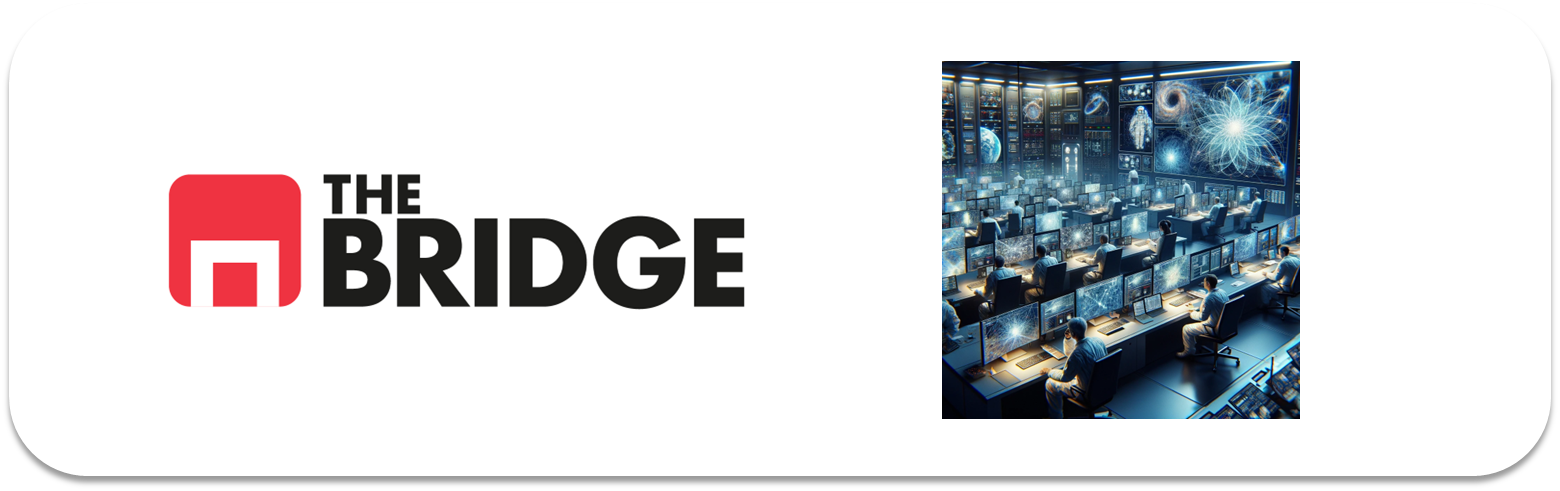

## PRACTICA OBLIGATORIA: **Transfer Learning y Fine Tuning**

* La práctica obligatoria de esta unidad consiste en un repetir el ejercicio de construcción de un modelo de clasificación de paisajes pero usando un modelo preentrenado. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import seaborn as sns

from skimage.io import imread
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import MobileNetV2

### Objetivo del ejercicio

Comparar una red convolucional hecha ad-hoc frente a los modelos preentrenados y ajustados con fine tuning y transfer learning. Para ello emplea el dataset de paisajes del conjunto de ejercicios de la unidad anterior.


### Se pide

1. Preparar los datos del modelo y las funciones de visualización, copia para ello todo lo que necesites de las soluciones del ejercicio de clasificación de paisajes de la unidad anterior.

2. Escoger entre uno de los modelos VGG-19, InceptionV3 y MobileNetV2 (todos en https://keras.io/api/applications/) (Se aconseja este último si no tenemos un ordenador muy potente). Si no te haces con estos puedes recurrir a la ResNetV50.

4. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

5. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

6. Comparar los resultados con los obtenidos con la red convolucional del ejercicio mencionado.

EXTRA:
- Repetir el transfer learning empleando aumentado de imágenes.



In [3]:
def read_data(directorio, reshape_dim = (224,224)):
    X = [] 
    y = []
    for folder in os.listdir(directorio):
        print(folder)
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

                X.append(image)
                y.append(folder)

    return np.array(X),np.array(y)

In [4]:
def read_df(directorio, reshape_dim = (224,224)):
    X = [] 
    y = []
    for folder in os.listdir(directorio):
        #print(folder)
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                #image = imread('/'.join([directorio, folder, file]))
                #image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

                X.append(file)#.split('.')[0])
                y.append(folder)

    df = pd.DataFrame({
        'filenames': X,
        'category': y
        })

    train_df, validate_df = train_test_split(df,
                                         test_size=0.20,
                                         random_state=42)

    train_df = train_df.reset_index(drop=True)
    validate_df = validate_df.reset_index(drop=True)
    return train_df, validate_df

In [5]:
train_df, val_df = read_df('./seg_train')

In [6]:
X_train,y_train = read_data('./seg_train')

buildings
forest
glacier
mountain
sea
street


In [7]:
X_test, y_test = read_data('./seg_test')

buildings


forest
glacier
mountain
sea
street


In [8]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)

X train shape:  (14034, 224, 224, 3)
Y train shape:  (14034,)


In [9]:
print('X train shape: ', X_test.shape)
print('Y train shape: ', y_test.shape)

X train shape:  (3000, 224, 224, 3)
Y train shape:  (3000,)


In [10]:
def show_images_batch(paisajes, names = [], n_cols = 5, size_scale = 2):
    n_rows = ((len(paisajes) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, paisaje in enumerate(paisajes):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(paisaje, cmap = "Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])

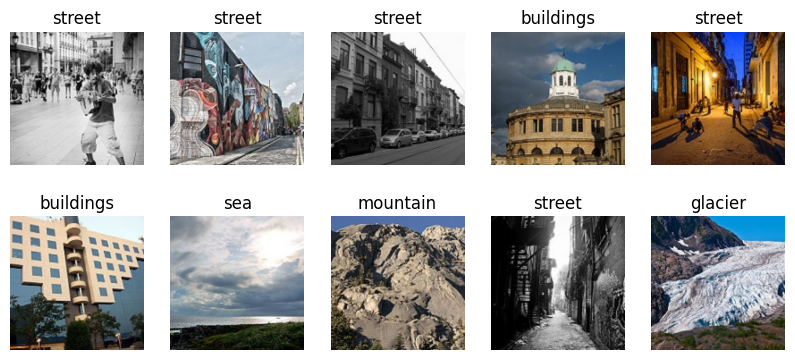

In [11]:
indices = np.random.randint(0,len(X_train),10)
show_images_batch(X_train[indices], names = y_train[indices], n_cols = 5)

# MobileNetV2:

In [7]:
base_model = MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
for layer in base_model.layers:
    layer.trainable = False

# Transfer-learning:

In [9]:
# Transfer-learning:

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,828,910 (14.61 MB)

 Trainable params: 3,794,798 (14.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [15]:
train_df.head()

,filenames,category
0,18007.jpg,mountain
1,9514.jpg,sea
2,1358.jpg,glacier
3,901.jpg,sea
4,5094.jpg,mountain


In [16]:
TRAIN_PATH = './seg_train'

IM_SIZE = 224

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('./seg_train', target_size=(224, 224),
                                                    batch_size=32, class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('./seg_test', target_size=(224, 224), 
                                                        batch_size=32, class_mode='categorical')

# Se que he puesto el repositorio de test en validacion. No consigo hacerlo de otra manera y necesito abanzar en la practica :(

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [12]:
history = model.fit(train_generator, epochs=2, validation_data=validation_generator)

Epoch 1/2


c:\Users\annav\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 1608s 4s/step - accuracy: 0.5343 - loss: 1.1913 - val_accuracy: 0.2530 - val_loss: 2.2048
Epoch 2/2
439/439 ━━━━━━━━━━━━━━━━━━━━ 1517s 3s/step - accuracy: 0.7563 - loss: 0.6945 - val_accuracy: 0.2617 - val_loss: 2.9228


In [13]:
test_generator = test_datagen.flow_from_directory('./seg_test', target_size=(224, 224),
                                                  batch_size=32, class_mode='categorical', shuffle=False)

loss, accuracy = model.evaluate(test_generator)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Found 3000 images belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 56s 600ms/step - accuracy: 0.4774 - loss: 2.3890
Loss: 2.9227678775787354, Accuracy: 0.2616666555404663


94/94 ━━━━━━━━━━━━━━━━━━━━ 55s 581ms/step
              precision    recall  f1-score   support

   buildings       0.23      0.97      0.38       437
      forest       0.11      0.01      0.02       474
     glacier       0.36      0.07      0.12       553
    mountain       0.43      0.58      0.50       525
         sea       1.00      0.00      0.00       510
      street       0.03      0.02      0.03       501

    accuracy                           0.26      3000
   macro avg       0.36      0.28      0.17      3000
weighted avg       0.37      0.26      0.17      3000



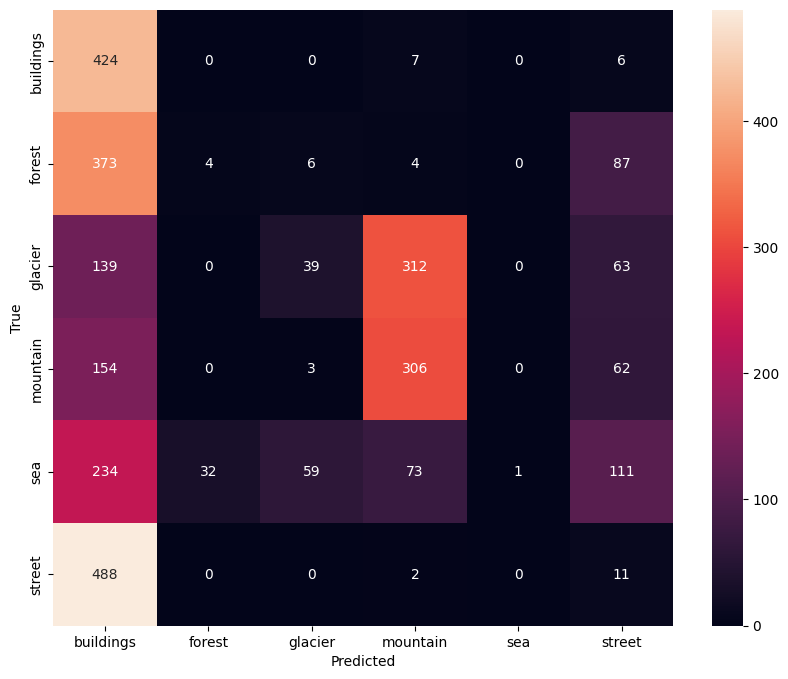

In [16]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Fine-tuning:

In [17]:
for layer in base_model.layers[-4:]: 
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 3
total_epochs = 2 + fine_tune_epochs

history_fine = model.fit(train_generator, epochs=total_epochs, initial_epoch=history.epoch[-1],
                         validation_data=validation_generator)

Epoch 2/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 1481s 3s/step - accuracy: 0.8275 - loss: 0.5341 - val_accuracy: 0.5853 - val_loss: 1.2509
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 2054s 5s/step - accuracy: 0.8391 - loss: 0.4950 - val_accuracy: 0.7663 - val_loss: 0.7050
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 1540s 3s/step - accuracy: 0.8560 - loss: 0.4557 - val_accuracy: 0.8197 - val_loss: 0.5475
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 1588s 4s/step - accuracy: 0.8605 - loss: 0.4342 - val_accuracy: 0.8370 - val_loss: 0.4840


94/94 ━━━━━━━━━━━━━━━━━━━━ 58s 613ms/step - accuracy: 0.8428 - loss: 0.4593
Loss: 0.4840126633644104, Accuracy: 0.8370000123977661
94/94 ━━━━━━━━━━━━━━━━━━━━ 60s 603ms/step
              precision    recall  f1-score   support

   buildings       0.13      0.10      0.11       437
      forest       0.15      0.14      0.14       474
     glacier       0.17      0.23      0.20       553
    mountain       0.16      0.15      0.16       525
         sea       0.18      0.13      0.15       510
      street       0.16      0.20      0.18       501

    accuracy                           0.16      3000
   macro avg       0.16      0.16      0.16      3000
weighted avg       0.16      0.16      0.16      3000



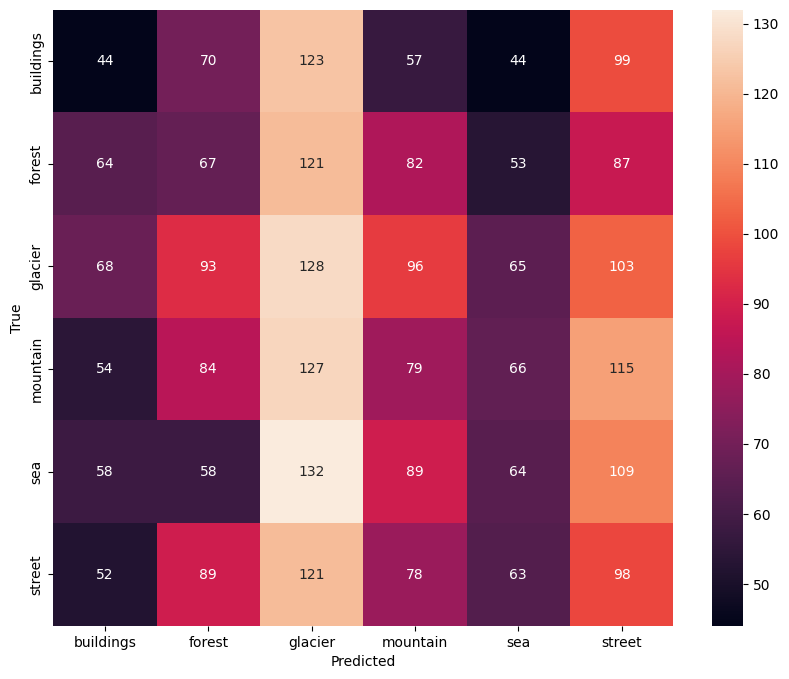

In [18]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()